C221011 김수민

# **공복혈당 기술통계량 분석**
공복혈당(Fasting Blood Glucose, FBG)
- 정상: 100mg/dL 미만
- 당뇨병 전단계: 100mg/dL 이상 125mg/dL 미만
- 당뇨병: 126mg/dL 이상 

해결 목표
1. 공복 혈당 수치를 난수를 이용하여 생성
2. 공복 혈당 수치에 따른 당뇨병 분류
3. 공복 혈당 수치의 기술통계량 계산


## 1. 데이터 준비

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib 

#데이터 값 표시 옵션 설정
pd.options.display.float_format = '{:.2f}'.format
#그래프 크기 설정 [width, height](inch 단위), 기본값: [6.4, 4.8]
#해상도를 높히고 자세한 그래프를 그리기 위해 크기를 조정 
plt.rcParams['figure.figsize']=[8,5]

In [344]:
#랜덤 시드 고정
np.random.seed(42)

#샘플 데이터 생성
data={
    #normal은 정규분포를 따르는 난수 생성
    'FBG': np.random.normal(100,20,100), #공복혈당, 평균100, 표준편차20, 100개 샘플 
    #randint는 균등분포를 따르는 난수 생성
    'age' : np.random.randint(18,80,100), #18세에서 80세 사이의 정수형 데이터 100개 
    #choice는 주어진 리스트에서 랜덤하게 선택
    'gender': np.random.choice(['Male','Female'],100) 
}
df= pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FBG     100 non-null    float64
 1   age     100 non-null    int32  
 2   gender  100 non-null    object 
dtypes: float64(1), int32(1), object(1)
memory usage: 2.1+ KB


100행으로 구성된 데이터프레임   
colume은 딕셔너리의 키 값 3개로 되어있고 FBG는 정규분포에서 생성했기 때문에 실수(float64), age는 정수(int32)로 생성, gender는 문자열(object)로 생성됨

In [345]:
df.head()

,FBG,age,gender
0,109.93,26,Male
1,97.23,79,Male
2,112.95,54,Female
3,130.46,50,Female
4,95.32,68,Male


## 2. FBG에 따라 당뇨병 분류

당뇨병 분류 함수 생성

In [346]:
def classifyDiabetes(fbg):
    if fbg < 100:
        return '정상'
    elif 100 <= fbg < 126:
        return '당뇨 전단계'
    else:
        return '당뇨병'

FBG열의 데이터를 이용해 당뇨병 여부를 분류하고 새로운 컬럼(당뇨병)에 추가함

In [347]:
#당뇨병 컬럼을 df에 추가
#apply 함수는 데이터 프레임 각 행에 대해 함수를 적용함
#lambda 함수는 익명 함수로, classifyDiabetes 함수를 각 행의 FBG 값에 적용하여 당뇨병 상태를 분류함
df['당뇨병']=df['FBG'].apply(lambda x: classifyDiabetes(x))
df.head()

,FBG,age,gender,당뇨병
0,109.93,26,Male,당뇨 전단계
1,97.23,79,Male,정상
2,112.95,54,Female,당뇨 전단계
3,130.46,50,Female,당뇨병
4,95.32,68,Male,정상


## 3. 기술통계량 계산

In [348]:
df.mean(numeric_only=True) #수치형 데이터의 평균값 계산

FBG   97.92
age   49.67
dtype: float64

In [349]:
df.median(numeric_only=True) #수치형 데이터의 중앙값 계산

FBG   97.46
age   50.00
dtype: float64

현재 평균값과 중앙값의 데이터가 같게 나온다. 정규분포임을 예상할 수 있다.   
- FBG 데이터 생성 시 정규 분포(normal)를 따르는 데이터를 생성했기 때문에 이런 결과값이 나온다.
- age를 생성할 때는 균등 분포(uniform distribution)을 따르도록 데이터를 생성했기 때문에 좌우 대칭 형태이므로 평균과 중앙값이 대략 일치한다.

In [350]:
df.mode().head(3) #데이터 프레임의 열별 최빈값 계산하여 상위 3개 출력

,FBG,age,gender,당뇨병
0,47.61,49.00,Female,정상
1,60.25,NaN,NaN,NaN
2,60.81,NaN,NaN,NaN


In [351]:
df[['age','gender','당뇨병']].mode() #수치형 데이터 FBG의 최빈값은 의미 없으므로 범주형 데이터 추려냄

,age,gender,당뇨병
0,49,Female,정상


pandas라이브러리 활용해 표본표준편차와 모표준편차 계산

In [352]:
df.std(numeric_only=True) #수치형 데이터의 표본표준편차 계산

FBG   18.16
age   19.16
dtype: float64

In [353]:
df.std(numeric_only=True,ddof=0) #수치형 데이터의 모표준편차 계산, pandas에서는 ddof=0으로 설정하면 모표준편차를 계산함

FBG   18.07
age   19.07
dtype: float64

pandas라이브러리 활용해 표본분산과 모분산 계산

In [354]:
df.var(numeric_only=True) #수치형 데이터의 표본분산 계산

FBG   329.91
age   367.21
dtype: float64

In [355]:
df.var(numeric_only=True,ddof=0) #수치형 데이터의 모분산 계산

FBG   326.61
age   363.54
dtype: float64

데이터 프레임의 열별 IQR 계산   
boxplot에 표시되는 항목이다 

In [356]:
#사분위수 계산 
quantile= df.quantile([0,0.25, 0.75,1], numeric_only=True)
print('사분위수:',)
display(quantile)

사분위수:


,FBG,age
0.00,47.61,18.00
0.25,87.98,34.00
0.75,108.12,67.25
1.00,137.05,79.00


In [357]:
#IQR 계산
#.loc는 행 이름으로 데이터 프레임의 행을 선택하는 방법
IQR=quantile.loc[0.75] - quantile.loc[0.25]
print('IQR:\n', IQR)

IQR:
 FBG   20.14
age   33.25
dtype: float64


데이터프레임의 열별 왜도 계산(수치형 데이터만)

In [358]:
df.skew(numeric_only=True) #데이터프레임의 열별 왜도 계산(수치형 데이터만)

FBG   -0.18
age   -0.11
dtype: float64

0에 가까우므로 거의 대칭적인 분포임을 뜻함(정규분포에 가까움)   
왼쪽으로 꼬리가 길면 음수 값을 가지고   
오른쪽으로 꼬리가 길면 양수값을 가짐   

데이터프레임의 열별 첨도 계산(수치형 데이터만)

In [359]:
df.kurt(numeric_only=True) #데이터프레임의 열별 첨도 계산(수치형 데이터만)

FBG   -0.10
age   -1.24
dtype: float64

Fisher 정의 기준에서 0에 가까우면 정규분포와 유사하고   
양수 값을 가지면 뾰족한 분포로 극단값이 많다는 의미 
음수 값을 가지면 평평한 분포로 극단값이 적다는 의미   

FBG는 0에 가까우므로 정규분포와 거의 유사하고   
age는 음수값을 가지므로 평평한 분포를 가진다는 의미이다(균등 분포로 데이터를 생성하였기 때문에 이런 값이 나온다)

기술 통계량 요약 출력

In [360]:
desc_stats=df.describe() #기술 통계량 요약 출력
print('기술 통계량 요약:\n', desc_stats)

기술 통계량 요약:
          FBG    age
count 100.00 100.00
mean   97.92  49.67
std    18.16  19.16
min    47.61  18.00
25%    87.98  34.00
50%    97.46  50.00
75%   108.12  67.25
max   137.05  79.00


## 4. 공복혈당(FBG) 분포 시각화
seaborn, matplotlib 활용

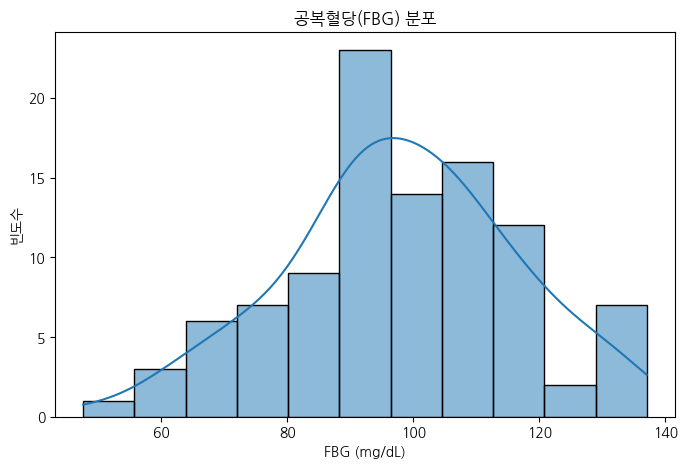

In [361]:
sns.histplot(
    df['FBG'],
    kde=True
    ) 
plt.title('공복혈당(FBG) 분포')
plt.xlabel('FBG (mg/dL)')
plt.ylabel('빈도수')
plt.show()

# **체질량지수에 따른 비만도 분류**
체질량 지수(BMI)
$$ BMI=체중(kg)/키(m)^2 $$

BMI 지수에 따른 비만도 분류 기준
| BMI 지수 범위      | 비만도 분류   |
|-------------------|---------------|
| 18.5 미만         | 저체중        |
| 18.5 이상 23 미만 | 정상          |
| 23 이상 25 미만   | 과체중        |
| 25 이상 30 미만   | 경도비만      |
| 30 이상 35 미만   | 중등도비만    |
| 35 이상           | 고도비만      |

해결 목표
1. 함수를 이용하여 체질량지수(BMI)를 계산
2. BMI 지수에 따른 비만도 분류를 수행
3. 기술 통계량 계산
4. 시각화

In [362]:
#필요 라이브러리 임포트 및 기본 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import koreanize_matplotlib

pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize']=[8,5]

## 1. 데이터 준비

In [363]:
np.random.seed(42)
#남성 데이터 생성
data_male={
    'weight':np.random.normal(75,5,50),
    'height':np.random.normal(170,10,50),
    'gender':'남성'
}
df_male=pd.DataFrame(data_male)
#여성데이터 생성
data_female={
    'weight':np.random.normal(50,5,50),
    'height':np.random.normal(160,5,50),
    'gender':'여성'
}
df_female=pd.DataFrame(data_female)

#데이터 병합, axis=0이면 밑으로 두 데이터 합침, index는 정돈 안 된 상태로 출력됨
df=pd.concat([df_male,df_female],axis=0)
df

,weight,height,gender
0,77.48,173.24,남성
1,74.31,166.15,남성
2,78.24,163.23,남성
3,82.62,176.12,남성
4,73.83,180.31,남성
...,...,...,...
45,53.91,161.93,여성
46,43.82,155.58,여성
47,43.40,160.77,여성
48,52.61,160.29,여성


BMI 지수 계산

In [364]:
## BMI 지수 계산 함수 정의
def calculateBMI(weight,height):
    return weight/(height/100)**2

#BMI 계산
df['BMI']=calculateBMI(df['weight'],df['height'])
df.head()

,weight,height,gender,BMI
0,77.48,173.24,남성,25.82
1,74.31,166.15,남성,26.92
2,78.24,163.23,남성,29.36
3,82.62,176.12,남성,26.64
4,73.83,180.31,남성,22.71


## 2. BMI 지수에 따른 비만도 분류
BMI 컬럼 데이터 값을 활용해 비만 여부 분류 후 새로운 컬럼(비만도)에 추가

In [365]:
def BMIToCategory(bmi):
    if bmi < 18.5:
        return '저체중'
    elif 18.5 <= bmi < 23:
        return '정상'
    elif 23 <= bmi < 25:
        return '과체중'
    elif 25<= bmi < 30:
        return '경도비만'
    elif 30 <= bmi < 35:
        return '중등도비만'
    else:
        return '고도비만'
#비만도 컬럼을 df에 추가
df['비만도']=df['BMI'].apply(lambda x: BMIToCategory(x))
df.head()

,weight,height,gender,BMI,비만도
0,77.48,173.24,남성,25.82,경도비만
1,74.31,166.15,남성,26.92,경도비만
2,78.24,163.23,남성,29.36,경도비만
3,82.62,176.12,남성,26.64,경도비만
4,73.83,180.31,남성,22.71,정상


## 3. 기술통계량 계산

In [366]:
desc_stats=df.describe() #기술 통계량 요약 출력
print('기술 통계량 요약:\n', desc_stats)

기술 통계량 요약:
        weight  height    BMI
count  100.00  100.00 100.00
mean    61.84  165.30  22.54
std     13.03    8.47   4.12
min     40.41  143.80  15.37
25%     50.19  159.63  19.22
50%     63.76  163.75  22.06
75%     73.83  170.88  25.59
max     84.26  185.65  34.95


요약을 보면 평균(mean)과 중앙값(50%)을 비교했을 때 약간씩 차이를 보이므로 정규분포인지 알 수 없다.

## 4. BMI 분포 시각화
seaborn, matplotlib 활용

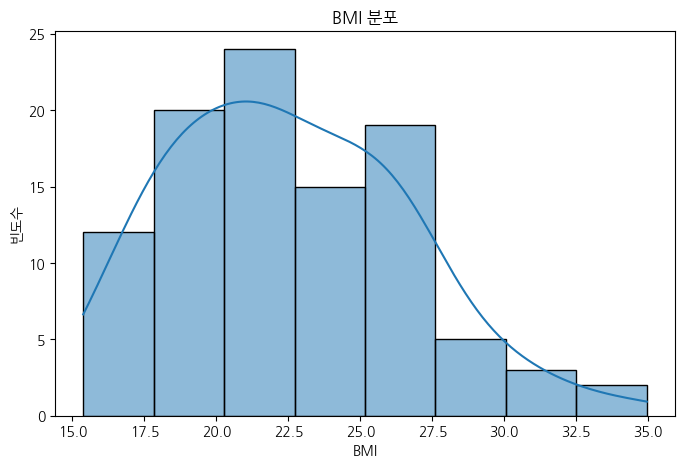

In [367]:
sns.histplot(
    df['BMI'],
    kde=True
)
plt.title('BMI 분포')
plt.xlabel('BMI')
plt.ylabel('빈도수')
plt.show()

왼쪽으로 쏠린 우변사행 형태를 가짐 

성별에 따른 BMI 분포 시각화

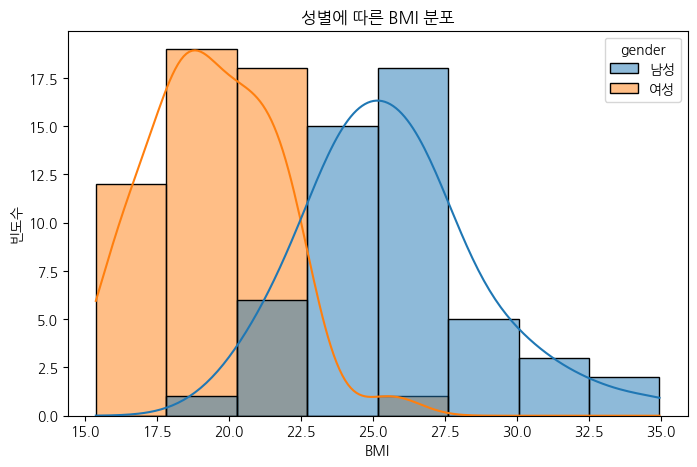

In [368]:
sns.histplot(
    data=df,
    x='BMI',
    kde=True,
    hue='gender'
)
plt.title('성별에 따른 BMI 분포')
plt.xlabel('BMI')
plt.ylabel('빈도수')
plt.show()

남자와 여자를 각기 보면 정규분포의 형태를 가지게 된다.  
전체적인 분포가 우변사행이라 하여서 정규분포를 따르지 않는다고 바로 판단하는 것이 아닌 데이터를 분류해가며 판단해봐야 함

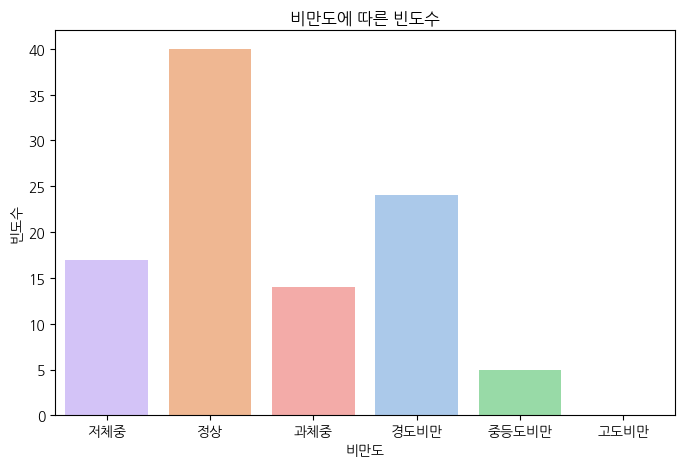

In [369]:
#countplot은 범주형 데이터의 빈도수를 시각화하는데 유용
#수치형 데이터의 경우에는 히스토그램을 사용
sns.countplot(
    data=df,
    x='비만도',
    order=['저체중','정상','과체중','경도비만','중등도비만','고도비만'],
    hue='비만도',
    palette='pastel'
)
plt.title('비만도에 따른 빈도수')
plt.xlabel('비만도')
plt.ylabel('빈도수')
plt.show()

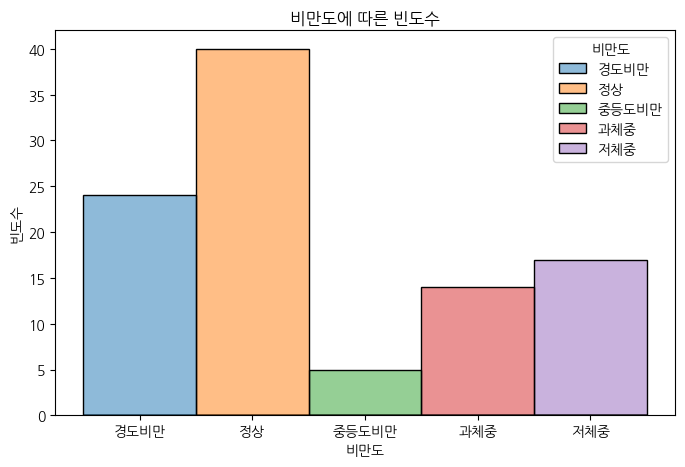

In [370]:
#범주형 데이터도 히스토그램으로 시각화 가능
sns.histplot(
    data=df,
    x='비만도',
    hue='비만도',
)
plt.title('비만도에 따른 빈도수')
plt.xlabel('비만도')
plt.ylabel('빈도수')
plt.show()

비만도 분류에 따른 인원수 시각화(성별)

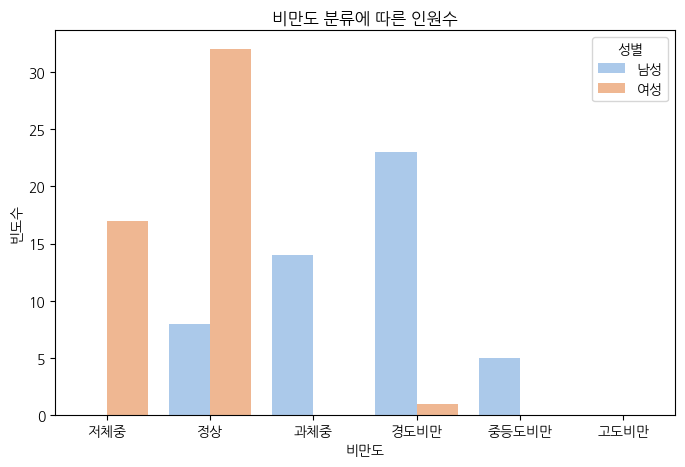

In [371]:
sns.countplot(
    data=df,
    x='비만도',
    order=['저체중','정상','과체중','경도비만','중등도비만','고도비만'],
    hue='gender',
    palette='pastel'
)
plt.title('비만도 분류에 따른 인원수')
plt.xlabel('비만도')
plt.ylabel('빈도수')
plt.legend(loc='upper right', title='성별')
plt.show()

성별 BMI 박스플롯 시각화

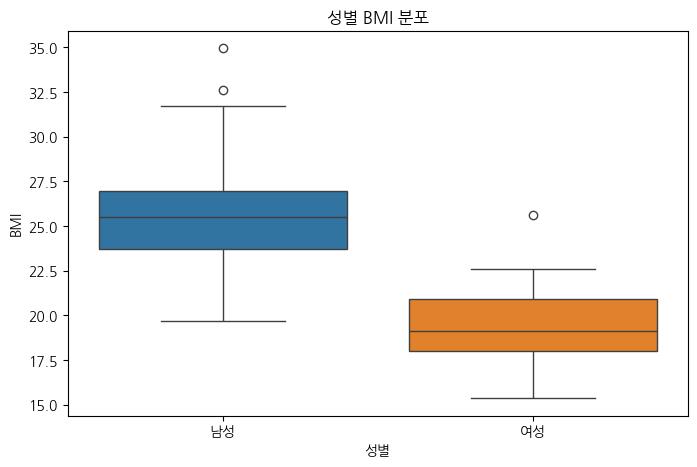

In [372]:
sns.boxplot(
    data=df,
    x='gender',
    y='BMI',
    hue='gender'
)
plt.title('성별 BMI 분포')
plt.xlabel('성별')
plt.ylabel('BMI')
plt.show()

# **수축기 혈압과 이완기 혈압의 상관관계 분석**
혈압(Blood Pressure)
- 수축기 혈압(SBP,Systolic Blood Pressure)
- 이완기 혈합(DBP,Diastolic Blood Pressure)

해결목표
 1. 수축기 혈압과 이완기 혈압을 난수를 이용하여 생성
 2. 혈압의 기술통계량 계산
 3. 수축기 혈압과 이완기 혈압의 분포 시각화
 4. 수축기 혈압과 이완기 혈압의 상관관계 분석

In [373]:
#필요 라이브러리 임포트 및 기본 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import koreanize_matplotlib

pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize']=[8,5]

## 1. 데이터준비

In [374]:
np.random.seed(42)
#100개의 수축기 혈압(SBP) 데이터 생성
data={
    'SBP': np.random.normal(120,15,100), #수축기 혈압, 평균120, 표준편차15, 100개 샘플 
}
df= pd.DataFrame(data)
df.head()

,SBP
0,127.45
1,117.93
2,129.72
3,142.85
4,116.49


In [375]:
#수축기 혈압을 이용하여 이완기 혈압 생성
df['DBP'] = df['SBP'] - np.random.randint(30,50,100) #이완기 혈압, 수축기 혈압에서 균등 분포 난수(30~50) 뺀 값
df.head()

,SBP,DBP
0,127.45,89.45
1,117.93,83.93
2,129.72,99.72
3,142.85,94.85
4,116.49,77.49


## 2. 기술통계량 계산

In [376]:
desc_stats=df.describe() #기술 통계량 요약 출력
print('기술 통계량 요약:\n', desc_stats)

기술 통계량 요약:
          SBP    DBP
count 100.00 100.00
mean  118.44  79.07
std    13.62  15.30
min    80.70  42.19
25%   110.99  66.80
50%   118.10  78.45
75%   126.09  90.95
max   147.78 113.07


50% 값이 중앙값이다. 평균과 비교해 정규분포인지 아닌지 추정할 수 있다. 현재 평균과 중앙값이 같은 값으로 나오므로 정규분포임을 추정할 수 있다.

## 3. 혈압 분포 시각화
subplot은 하나의 figure에 ax를 나눠서 그리는 것이다.

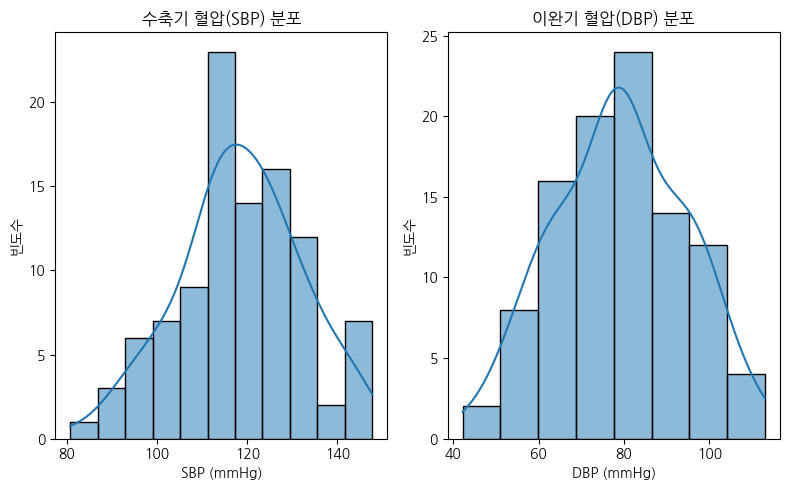

In [377]:
#서브플롯 생성
fig, axes = plt.subplots(1, 2) #1행 2열의 서브플롯 생성

#수축기 혈압(SBP) 분포 시각화
sns.histplot(
    df['SBP'],
    kde=True,
    ax=axes[0]  # 첫 번째 서브플롯에 그리기
)
#서브플롯 제목, x축, y축 레이블 설정
axes[0].set_title('수축기 혈압(SBP) 분포')
axes[0].set_xlabel('SBP (mmHg)')
axes[0].set_ylabel('빈도수')

#이완기 혈압(DBP) 분포 시각화
sns.histplot(
    df['DBP'],
    kde=True,
    ax=axes[1],  # 두 번째 서브플롯에 그리기
)
#서브플롯 제목, x축, y축 레이블 설정
axes[1].set_title('이완기 혈압(DBP) 분포')
axes[1].set_xlabel('DBP (mmHg)')
axes[1].set_ylabel('빈도수')

#서브플롯 간격 조정
plt.tight_layout() #서브플롯 간격 조정
plt.show() #그래프 출력

## 4. 혈압 상관관계 분석

In [378]:
#수축기 혈압(SBP)과 이완기 혈압(DBP)의 상관관계 분석
corr=df['SBP'].corr(df['DBP']) #상관계수 계산
print('수축기 혈압(SBP)과 이완기 혈압(DBP)의 상관계수:', corr)

수축기 혈압(SBP)과 이완기 혈압(DBP)의 상관계수: 0.901151300689107


혈압 상관관계 시각화

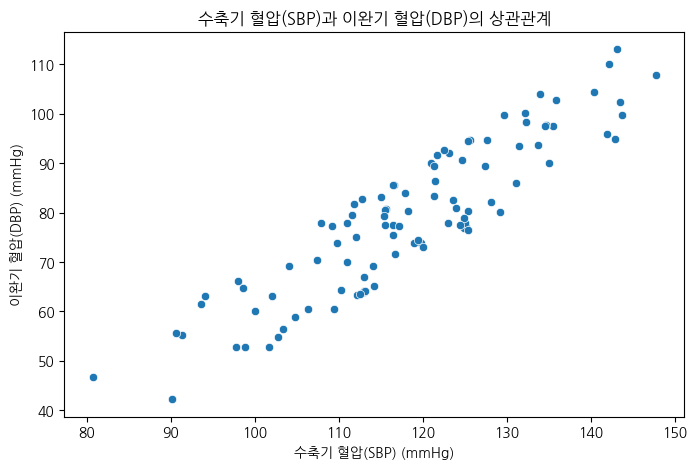

In [379]:
sns.scatterplot(
    data=df,
    x='SBP',
    y='DBP',
)
plt.title('수축기 혈압(SBP)과 이완기 혈압(DBP)의 상관관계')
plt.xlabel('수축기 혈압(SBP) (mmHg)')  
plt.ylabel('이완기 혈압(DBP) (mmHg)')
plt.show()